# Visualizing the Data

Let's take a look at content types, 

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import textwrap
import seaborn as sn
from wordcloud import WordCloud
from PIL import Image
from pathlib import Path
from my_functions import *


Load in the ***Streaming_Clean_Final.csv*** file created at the end of the clean up notebook.

In [ ]:
# Import the final dataframe csv file in a way that ensures we can play with the data without impacting the original source
# Create the path that points to the final cleaned DataFrame
visualization_file = Path("Data/Streaming_Clean_Final.csv")
# Immport the csv file pointed to by visualization_file into a DataFrame object called visuals & read in the file with the "python" engine to avoid memory issues from having mixed dtypes in certain columns
visuals = pd.read_csv(visualization_file, engine = "python")
# Display the first three rows of the new DataFrame 
visuals.head(3)

,Title,Content_Type,Combined_Genres,Release_Year,IMDb_ID,IMDb_Avg_Rating,IMDb_Votes_Count,Service_Name,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7
0,Four Rooms,movie,Comedy,1995,tt0113101,6.7,113746,AppleTV,Comedy,NaN,NaN,NaN,NaN,NaN,NaN
1,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2361972,AppleTV,Drama,Romance,NaN,NaN,NaN,NaN,NaN
2,American Beauty,movie,Drama,1999,tt0169547,8.3,1243981,AppleTV,Drama,NaN,NaN,NaN,NaN,NaN,NaN


### **Data Dictionary**
This is the data dictionary associated with final dataframe, streaming_clean.					

| Field | Description | Source |  Data Type | Example |
|:------|:------------|:-------|:---------- |:--------|
| Title | The name of the movie or tv show. | From the original csv files| text string | Breakfast at Tiffany's |
| Content_Type | The title content, either "movie" or "tv." | Renamed from the original service platform dataframes. | text string | movie |
| Combined_Genres | Includes all available genres in alphabetical order. | Renamed from the original service platform dataframes. | text string | Comedy, Drama, Romance |
| Release_Year | The year the movie or tv show was released according to the streaming platform.  | Renamed from the original service platform dataframes. | int | 1961 |
| IMDb_ID | The IMDb ID, if present, a unique value used in the URL of the IMDb content listing. | Renamed from the original service platform dataframes. | text string | tt0054698 |
| IMDb_Avg_Rating | The average rating by customers on IMDb  | Renamed from the original service platform dataframes. | float | 7.6|
| IMDb_Votes_Count | The total number of votes by customers on IMDb | Renamed from the original service platform dataframes. | int | 197447 |
| Service_Name | The streaming platform name. | Created field based on the service from which the data came. | text string | AppleTV |
| Genre_1 | The first genre in the Combined_Genres field, if present. | Created field from splitting the genres field from the original file into individual columns. | text string | Comedy |
| Genre_2 | The second genre in the Combined_Genres field, if present. | Created field from splitting the genres field from the original file into individual columns. | text string | Drama |
| Genre_3 | The third genre in the Combined_Genres field, if present. | Created field from splitting the genres field from the original file into individual columns. | text string | Romance |
| Genre_4 | The fourth genre in the Combined_Genres field, if present. | Created field from splitting the genres field from the original file into individual columns. | text string | NaN | 
| Genre_5 | The fifth genre in the Combined_Genres field, if present. | Created field from splitting the genres field from the original file into individual columns. | text string | NaN |
| Genre_6 | The sixth genre in the Combined_Genres field, if present. | Created field from splitting the genres field from the original file into individual columns. | text string | NaN |
| Genre_7 | The seventh genre in the Combined_Genres field, if present. | Created field from splitting the genres field from the original file into individual columns. | text string | NaN | 

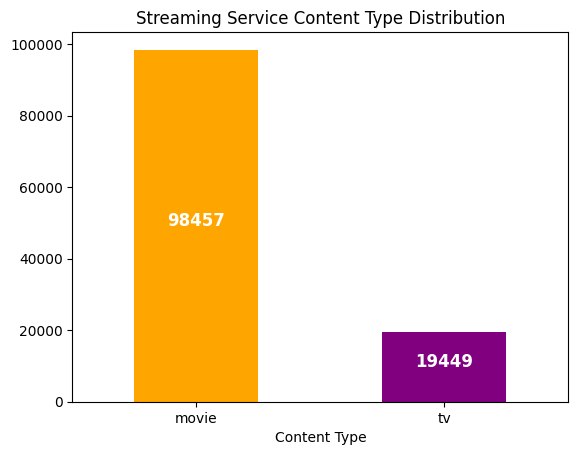

In [5]:
# Crate a bar graph to show distribution of content types from the Content_Type column
# Plot it with orange for "movies" and purple for "tv"
visuals["Content_Type"].value_counts().plot(kind='bar',color=["orange","purple"])
# Add a plot title
plt.title("Streaming Service Content Type Distribution")
# Change the orientation of the x ticks
plt.xticks(rotation = 360)
# Relable the X axis
plt.xlabel("Content Type")
# Use function to add value counts inside bars
add_bar_value_counts_lg()
# Show the bar graph 
plt.show()

Content Type Analysis
- Among the four streaming services analyzed, the majority of content is steeped in movies over tv shows
- There appears to be nearly 5 times the amount of movies vs tv shows offered among all four platforms

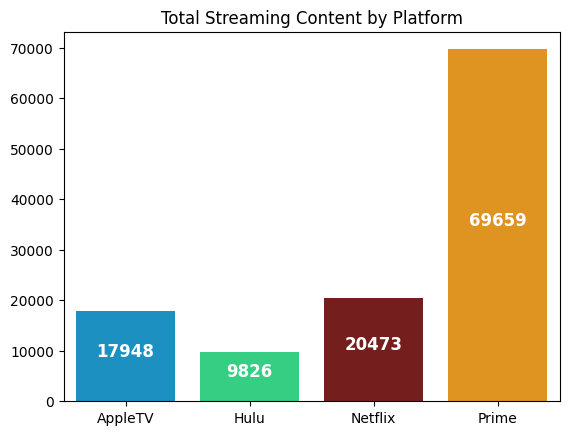

In [6]:
# Plotting which streaming platform contains the most content
chart = sn.countplot(visuals, x = "Service_Name", hue = "Service_Name", palette = ["#009DDC","#1CE783","#831010","#FF9900"])
# Remove x and y labels
chart.set_ylabel("")
chart.set_xlabel("")
# Set titles
chart.set_title("Total Streaming Content by Platform")
# Use function to add value counts to the bars
add_bar_value_counts_lg()
# Display plot
plt.show()